<a href="https://colab.research.google.com/github/Vattikolla/FMML-2024/blob/main/mod3_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-4 : Understanding Cross-Validation and Standardization
#### Module Coordinator: Jashn Arora
---

# **Section 1: Tweaking the parameters**

Let's stat the lab by writing knn code on a cancer detection dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = cancer.data
y = cancer.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Section 1.1: Changing Value of K
Let's try to run the knn with different values of knn and compare the results

In [7]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

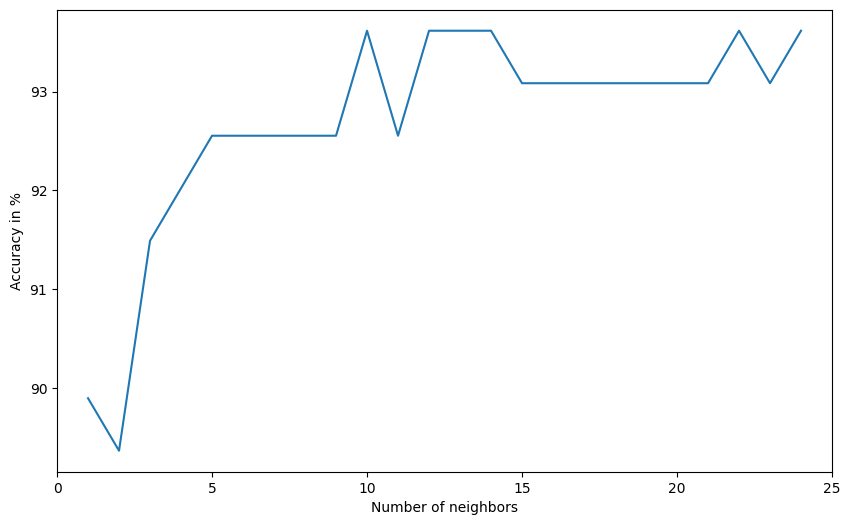

In [8]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [9]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In this case, we see that the ideal number of neighbours can take any one of the values in the list [10,12,13,14,22,24].  
However, this only tells us the effectiveness of the KNN classifier only if we have the same train-test split considered above. It still does not tell us how well the algorithm would perform if the test set were different. The results would have been different if we had split the data differently.

### AUC-ROC Curve

The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.  
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).    
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [10]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

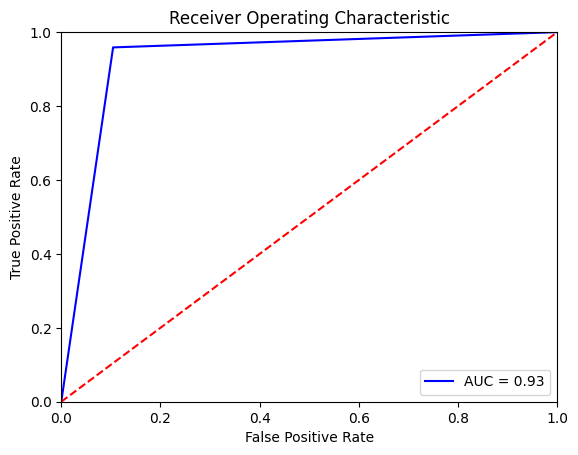

In [11]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

## Section 1.2: KNN using a different train-test split

In [12]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [13]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

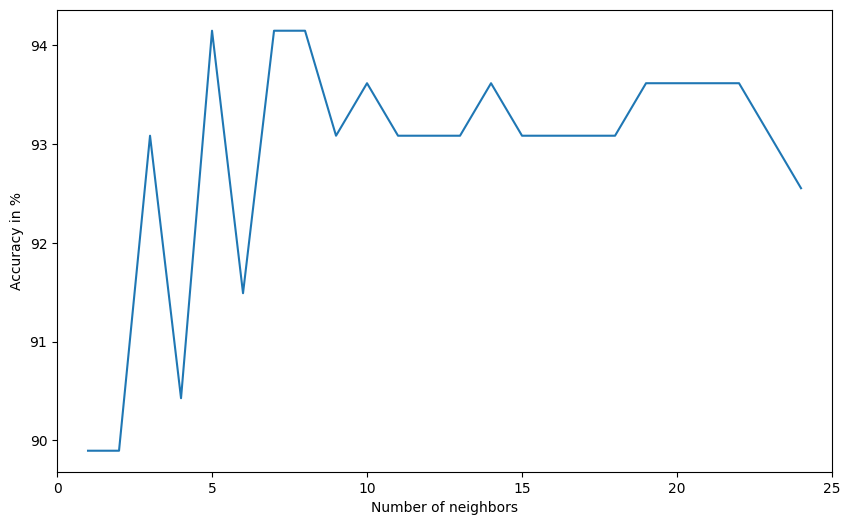

In [14]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [15]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


As you can see, the model gives different results when we split the data differently. Here, it suggests that the ideal k value is 5, 7 or 8.

# **Section 2: Cross Validation**

As you saw in the above two cases with different train-test splits, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.  

Cross Validation is an important technique in Machine Learning to analyze the performance of a model on **unseen** data.  

There are different kinds of cross-validation methods: exhaustive and non-exhaustive.   
Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.

One of the most commonly cross-validation methods is **K-Fold Cross validation**. The procedure for K-Fold Cross Validation is as follows:  
1. Split the dataset into k groups (typically without shuffling)
2. For each unique group:  
  a. Take the group as a hold out or test data set  
  b. Take the remaining groups as a training data set  
  c. Fit a model on the training set and evaluate it on the test set  
  d. Retain the evaluation score and discard the model  
3. Summarize the performance of the model using the mean of model evaluation scores over all the folds.

Image source: https://scikit-learn.org/stable/modules/cross_validation.html  
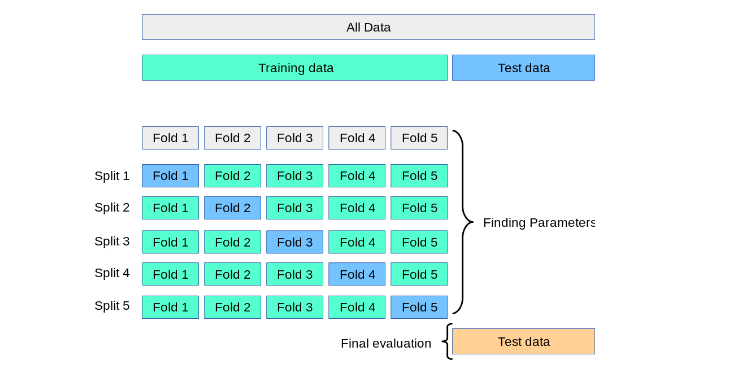

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [17]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

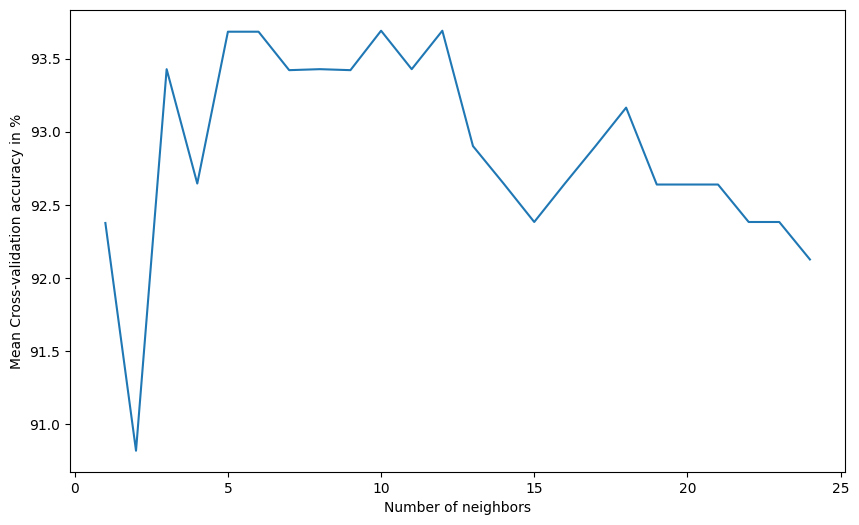

In [18]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [19]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


Note that the accuracy in the above case is not the accuracy on the test set. We plot the mean of the accuracies obtained during cross-validation, when we considered different splits of the training set.  

From the plot above, we can see that when the value of k is 10 or 12, our KNN model generalizes well to unseen data. Performing such cross validation gives us an idea about the parameters to choose when using a machine-learning algorithm.

In [20]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
model = RandomForestClassifier()

# Lists to store results
fold_accuracies = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    # Display results for each fold
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Display average accuracy across folds
print(f"\nAverage Accuracy: {sum(fold_accuracies) / len(fold_accuracies):.4f}")

Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9667
Fold 3: Accuracy = 0.9333
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 0.9000

Average Accuracy: 0.9600


# **Section 3: Standardization**


Scaling the data that we have available is a recommended pre-processing step when working with many machine learning algorithms. The scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled, and the model may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.  

Standardization (also called z-score normalization) is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$


In [21]:
X = cancer.data
y = cancer.target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [24]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

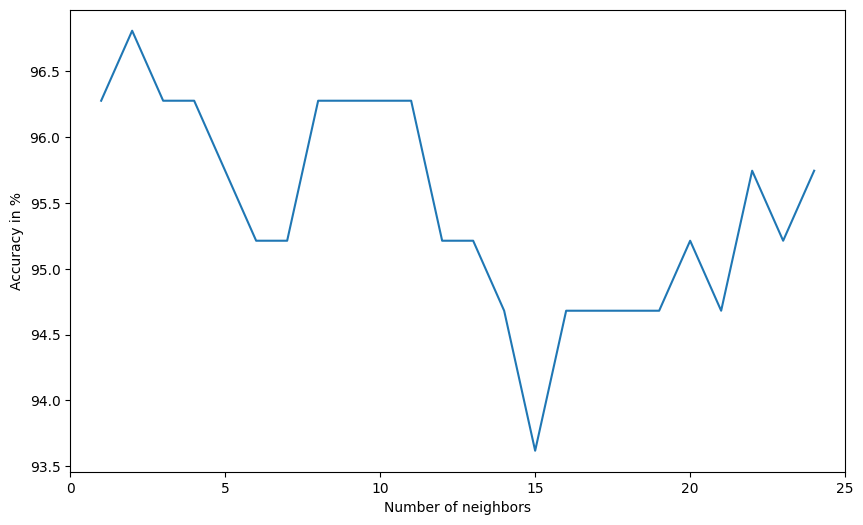

In [25]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [26]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


Optimal value of k: 6


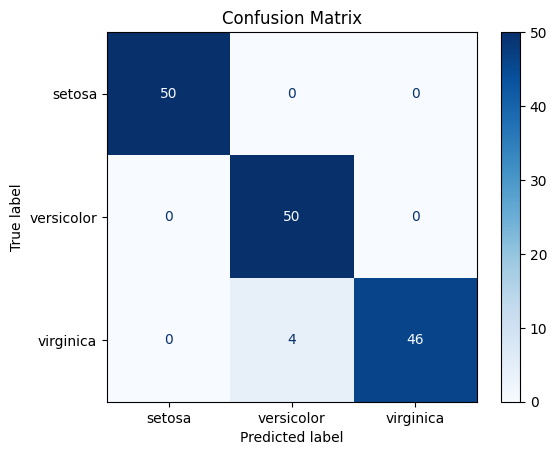

Precision: 0.9753
Recall: 0.9733
F1 Score: 0.9733


In [27]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal value of k using cross-validation
k_values = range(1, 11)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    k_scores.append(scores.mean())

optimal_k = k_values[np.argmax(k_scores)]
print(f"Optimal value of k: {optimal_k}")

# Train the model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the predictions and true values for final evaluation
y_pred_all, y_true_all = [], []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train model
    knn.fit(X_train, y_train)

    # Predict on test data
    y_pred = knn.predict(X_test)
    y_pred_all.extend(y_pred)
    y_true_all.extend(y_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate and print precision, recall, and F1-score
precision = precision_score(y_true_all, y_pred_all, average='weighted')
recall = recall_score(y_true_all, y_pred_all, average='weighted')
f1 = f1_score(y_true_all, y_pred_all, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [28]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results.
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
knn = KNeighborsClassifier(n_neighbors=5)  # Here we choose k=5 for simplicity, or use any optimal k if known

# Perform K-Fold Cross Validation
scores = cross_val_score(knn, X_scaled, y, cv=kf)

# Display the accuracy for each fold and the average accuracy
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

print(f"\nAverage Accuracy: {np.mean(scores):.4f}")

Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9667
Fold 3: Accuracy = 0.9667
Fold 4: Accuracy = 0.9000
Fold 5: Accuracy = 0.9667

Average Accuracy: 0.9600


Text(0, 0.5, 'sepal width (cm) (standardized)')

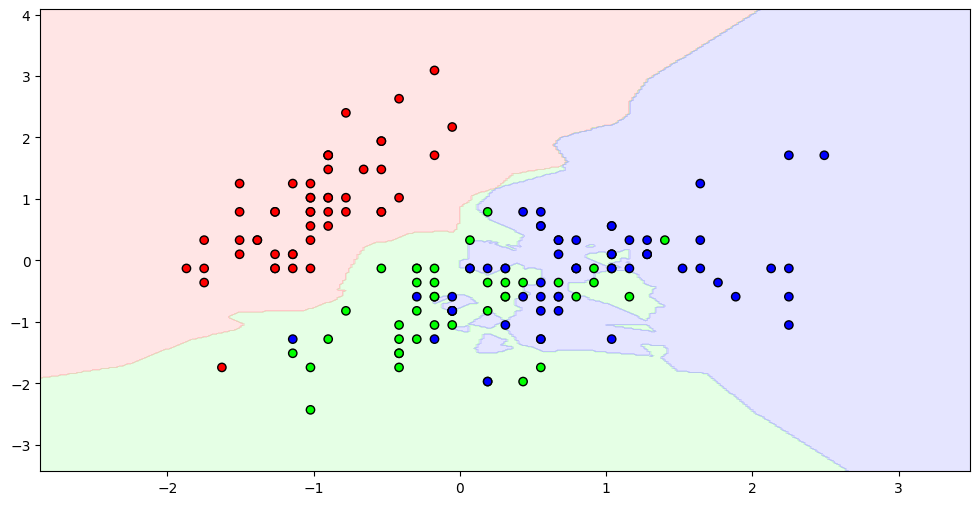

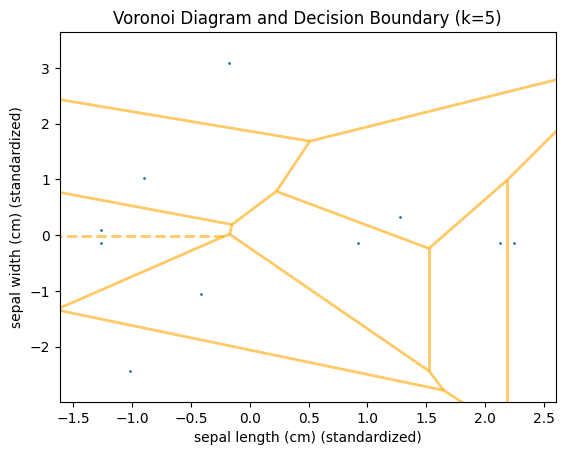

In [29]:
## TASK-4:
## Plot the vornoi and decision boundary diagram for the classifier from TASK-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap

# Load and prepare the data (using only the first two features for visualization)
data = load_iris()
X = data.data[:, :2]  # Select only the first two features for 2D plotting
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KNN model with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled, y)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))

# Voronoi diagram
# Generate Voronoi based on a dense sample of the standardized data points for a clean boundary
sample_points = np.array([X_scaled[i] for i in range(len(X_scaled)) if i % (len(X_scaled)//10) == 0])
vor = Voronoi(sample_points)
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

# Title and labels
plt.title(f'Voronoi Diagram and Decision Boundary (k={k})')
plt.xlabel(data.feature_names[0] + ' (standardized)')
plt.ylabel(data.feature_names[1] + ' (standardized)')

# Show plot

### Questions to Think About and Answer
1. Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.  
What do you think are the pros/cons of this method ?  
A.Splitting the dataset into train, validation, and test sets is a common approach in machine learning, but it has both advantages and disadvantages compared to cross-validation. Here’s a breakdown:

Pros of Train-Validation-Test Split:

1. Simplicity and Speed:

This method is simple to set up and is typically faster than cross-validation, especially for large datasets.

Training, validating, and testing are performed only once, which can save time compared to cross-validation where the model is trained multiple times (once for each fold).



2. Clearer Workflow for Hyperparameter Tuning:

By setting aside a separate validation set, you can tune hyperparameters and make adjustments without overfitting to the test set, preserving it for final evaluation.

After tuning on the validation set, the test set provides an unbiased estimate of model performance on completely unseen data.



3. Less Computationally Intensive:

Cross-validation requires training the model multiple times (once per fold), which can be computationally expensive, especially for complex models or very large datasets.

A single split into train, validation, and test sets reduces this computational load.




Cons of Train-Validation-Test Split:

1. Increased Risk of Overfitting to Validation Set:

If the validation set is too small, it may not adequately represent the full diversity of the data, leading to overfitting on the validation set.

The model may appear to perform well during tuning but generalize poorly on new data.



2. Reduced Data for Training:

Splitting into three sets reduces the amount of data available for training. For example, with a 60-20-20 split, only 60% of the data is used for training.

Cross-validation, in contrast, allows the model to be trained on almost the entire dataset (with each fold training on K-1 folds), resulting in potentially better generalization.



3. High Variance in Performance Estimates:

With a single train-test split, the performance estimate can be highly sensitive to the specific samples in each set. If the data split isn’t representative, the evaluation may not reflect true model performance.

Cross-validation mitigates this by averaging performance across multiple folds, providing a more stable estimate.



4. More Suitable for Larger Datasets:

This approach works well with large datasets where each split is likely representative of the data distribution. However, with smaller datasets, a train-validation-test split may lead to unreliable results due to insufficient samples in each subset.




Summary

Using a train-validation-test split is often more straightforward and less computationally demanding, making it a good choice for large datasets and when computational resources are limited. However, for smaller datasets or when high performance estimates are crucial, cross-validation provides a more reliable measure of model performance, as it uses more data for training and minimizes variability in evaluation results.


2. Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.
A.K-Fold cross-validation is considered a non-exhaustive cross-validation method.

Explanation:

Exhaustive cross-validation methods, like Leave-One-Out Cross-Validation (LOOCV), evaluate every possible way of dividing the dataset into training and test sets. For a dataset with  samples, LOOCV iteratively uses  samples for training and the remaining 1 sample for testing, repeating this process  times to cover every possible test sample. This approach fully "exhausts" all possible splits, making it exhaustive.

Non-exhaustive cross-validation methods, like K-Fold cross-validation, do not evaluate all possible splits. Instead, the dataset is divided into  folds, and the model is trained and tested  times, each time using  folds for training and 1 fold for testing. This process covers only  specific data splits (as opposed to every possible one), meaning it does not "exhaust" all combinations.


Why K-Fold is Non-Exhaustive:

1. Limited Number of Splits: K-Fold cross-validation performs only  splits, rather than all possible splits of the dataset. The choice of  limits the number of ways the dataset is divided.


2. Reduced Computational Cost: Non-exhaustive methods like K-Fold are computationally efficient because they do not require training and testing on every possible split. This is why K-Fold cross-validation is more commonly used, as it strikes a balance between performance estimation and computational cost.


3. Scalability: Exhaustive methods can be impractical for large datasets, as the number of possible splits grows significantly with more samples. K-Fold cross-validation, however, is scalable and applicable to larger datasets.



In summary, K-Fold cross-validation is non-exhaustive because it evaluates only a limited number of dataset splits (determined by ) rather than covering every possible split.

### Useful Resources for further reading
1. Cross validation (scikit-learn): https://scikit-learn.org/stable/modules/cross_validation.html  
2. Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
3. Standardization: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/  
4. AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
